## Import Lib

In [145]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.font_manager as fm
import warnings
import geopandas as gpd
from matplotlib_scalebar.scalebar import ScaleBar

warnings.filterwarnings('ignore')

# load font thai sarabun
#!wget -q https://github.com/git1userjojo/DADS5001_midtermProject/tree/main/data/fonts/THSarabunNew.ttf
#font = THSarabunNew.ttf
font = r'D:\Nida\nida_term01_02\DADS5001\GIT\data\fonts\THSarabunNew.ttf'

# font option
fm.fontManager.addfont(font)
plt.rcParams ['font.family'] = ('TH Sarabun New')
font = {#'weight' : 'bold',
        'size'   : 15}
plt.rc('font', **font)

file1 = 'https://raw.githubusercontent.com/git1userjojo/DADS5001_midtermProject/refs/heads/main/data/cleaned/TH_waste_All.csv'
file2 = 'https://raw.githubusercontent.com/git1userjojo/DADS5001_midtermProject/refs/heads/main/data/cleaned/TH_waste_by_province.csv'

In [146]:
# boundary
b_province = 'https://raw.githubusercontent.com/git1userjojo/DADS5001_midtermProject/refs/heads/main/data/boundary/province.geojson'
b_district = 'https://raw.githubusercontent.com/git1userjojo/DADS5001_midtermProject/refs/heads/main/data/boundary/Bangkok_district.geojson'
b_oceanicasian = 'https://raw.githubusercontent.com/git1userjojo/DADS5001_midtermProject/refs/heads/main/data/boundary/asia_ocean.geo.json'

In [147]:
map_df_p = gpd.read_file(b_province, driver='GeoJSON')
map_df_d = gpd.read_file(b_district, driver='GeoJSON')
map_df_oa = gpd.read_file(b_oceanicasian, driver='GeoJSON')
display(map_df_p.info())
display(map_df_d.info())
display(map_df_oa.info())

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Shape_Leng  77 non-null     float64 
 1   Shape_Area  77 non-null     float64 
 2   ADM1_EN     77 non-null     object  
 3   ADM1_TH     77 non-null     object  
 4   ADM1_PCODE  77 non-null     object  
 5   ADM1_REF    0 non-null      object  
 6   ADM1ALT1EN  0 non-null      object  
 7   ADM1ALT2EN  0 non-null      object  
 8   ADM1ALT1TH  0 non-null      object  
 9   ADM1ALT2TH  0 non-null      object  
 10  ADM0_EN     77 non-null     object  
 11  ADM0_TH     77 non-null     object  
 12  ADM0_PCODE  77 non-null     object  
 13  date        77 non-null     object  
 14  validOn     77 non-null     object  
 15  validTo     0 non-null      object  
 16  geometry    77 non-null     geometry
dtypes: float64(2), geometry(1), object(14)
memory usage: 10.4+ KB


None

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Shape_Leng  50 non-null     float64 
 1   Shape_Area  50 non-null     float64 
 2   ADM2_EN     50 non-null     object  
 3   ADM2_TH     50 non-null     object  
 4   ADM2_PCODE  50 non-null     object  
 5   ADM2_REF    0 non-null      object  
 6   ADM2ALT1EN  0 non-null      object  
 7   ADM2ALT2EN  0 non-null      object  
 8   ADM2ALT1TH  0 non-null      object  
 9   ADM2ALT2TH  0 non-null      object  
 10  ADM1_EN     50 non-null     object  
 11  ADM1_TH     50 non-null     object  
 12  ADM1_PCODE  50 non-null     object  
 13  ADM0_EN     50 non-null     object  
 14  ADM0_TH     50 non-null     object  
 15  ADM0_PCODE  50 non-null     object  
 16  date        50 non-null     object  
 17  validOn     50 non-null     object  
 18  validTo     0 non-null      object  
 19  ge

None

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 85 entries, 0 to 84
Columns: 170 entries, featurecla to geometry
dtypes: float64(4), geometry(1), int64(27), object(138)
memory usage: 113.0+ KB


None

In [148]:
map_df_p = map_df_p[['Shape_Leng', 'Shape_Area', 'ADM1_EN', 'ADM1_TH', 'ADM1_PCODE', 'geometry']]
map_df_d= map_df_d[['Shape_Leng', 'Shape_Area', 'ADM2_EN', 'ADM2_TH', 'ADM2_PCODE', 'geometry']]
map_df_p['ADM1_EN'] = map_df_p['ADM1_EN'].str.replace('Bangkok', 'Krung Thep Maha Nakhon (Bangkok)')
map_df_d['ADM2_TH'] = map_df_d['ADM2_TH'].str.replace('ป้อมปราบศัตรูพ่า', 'ป้อมปราบศัตรูพ่าย')

In [149]:
df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)

## Country

In [150]:
# 

## การจัดการขยะในประเทศไทยเปลี่ยนแปลงอย่างไรบ้าง

In [151]:
df1.columns

Index(['Solid waste', 'Unit Measure', 'TIME_PERIOD', 'OBS_VALUE'], dtype='object')

In [152]:
df1percentage = df1.drop('Unit Measure', axis=1).pivot(index='TIME_PERIOD', columns='Solid waste', values='OBS_VALUE')
df1percentage['Improperly disposed solid waste'] = df1percentage['Improperly disposed solid waste']*100/df1percentage['Generated solid waste']
df1percentage['Properly disposed solid waste'] = df1percentage['Properly disposed solid waste']*100/df1percentage['Generated solid waste']
df1percentage['Recycled solid waste'] = df1percentage['Recycled solid waste']*100/df1percentage['Generated solid waste']
df1percentage

Solid waste,Generated solid waste,Improperly disposed solid waste,Properly disposed solid waste,Recycled solid waste
TIME_PERIOD,,,,
2556,73353.95266,52.793075,27.961756,19.284829
2557,71765.83553,51.514727,29.356561,19.128950
2558,73557.99803,50.523908,31.081148,18.395027
2559,74129.16537,43.174346,35.371727,21.455614
2560,74980.03000,26.214900,42.707345,31.097667
2561,76528.74000,26.224842,38.841186,34.933986
2562,78665.17000,22.223062,34.102526,43.606072
2563,69322.01000,31.053225,36.008275,32.939033
2564,68434.00000,31.252009,37.152585,31.595406


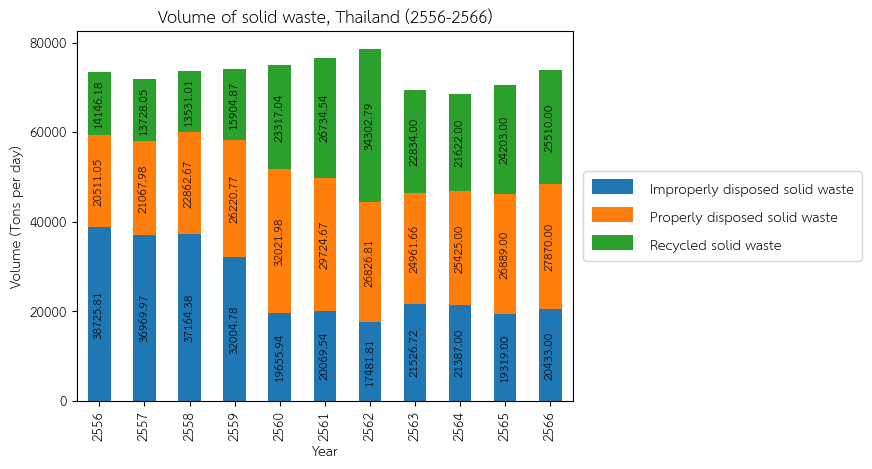

In [153]:
df1_1 = df1.drop('Unit Measure', axis=1).pivot(index='TIME_PERIOD', columns='Solid waste', values='OBS_VALUE').drop('Generated solid waste', axis=1)
ax = df1_1.plot(kind='bar', stacked=True, )
plt.xlabel('Year')
plt.ylabel('Volume (Tons per day)')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('Volume of solid waste, Thailand (2556-2566)')

#ax.annotate(df1percentage['Improperly disposed solid waste'][:1], xy = (df1percentage['TIME_PERIOD'], df1percentage['Improperly disposed solid waste']), fontsize="small")

for num in range(3):
    # customize the label to include the percent
    labels = [f'{float(df1_1.iloc[i, num]):.2f}' for i, v in enumerate(ax.containers[num])]

    # set the bar label
    ax.bar_label(ax.containers[num], labels=labels, label_type='center', size=13, rotation = 90, rotation_mode = 'anchor')

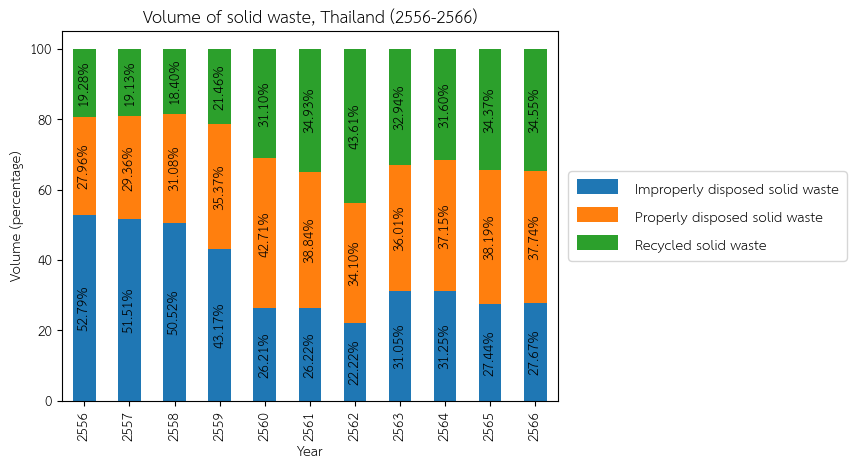

In [154]:
ax = df1percentage.drop('Generated solid waste', axis=1).plot(kind='bar', stacked=True, )
plt.xlabel('Year')
plt.ylabel('Volume (percentage)')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('Volume of solid waste, Thailand (2556-2566)')

#ax.annotate(df1percentage['Improperly disposed solid waste'][:1], xy = (df1percentage['TIME_PERIOD'], df1percentage['Improperly disposed solid waste']), fontsize="small")

for num in range(3):
    # customize the label to include the percent
    labels = [f'{df1percentage.iloc[i, num+1]:.2f}%' for i, v in enumerate(ax.containers[num])]

    # set the bar label
    ax.bar_label(ax.containers[num], labels=labels, label_type='center', size=15, rotation = 90, rotation_mode = 'anchor')


Text(0.5, 1.0, 'Volume of solid waste, Thailand (2556-2566)')

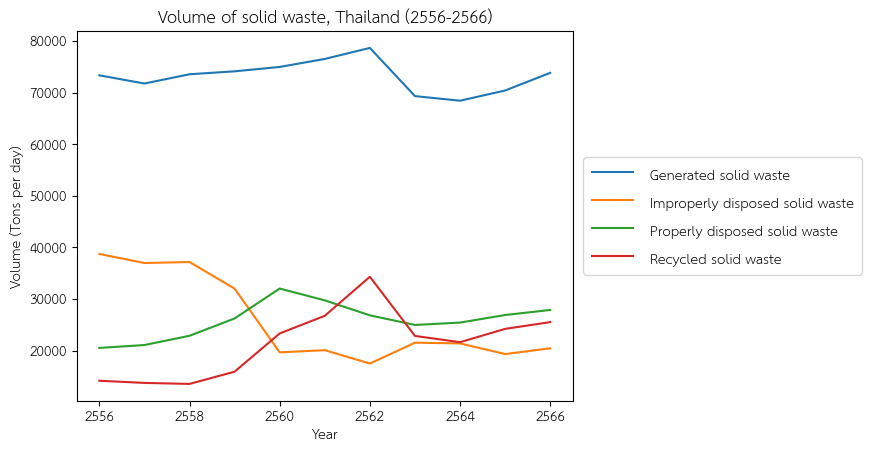

In [155]:
df1cat = df1.drop('Unit Measure', axis=1).pivot(index='TIME_PERIOD', columns='Solid waste', values='OBS_VALUE')
#df1cat.loc[:, df1cat.columns != 'Generated solid waste'].plot()
df1cat.plot()
plt.xlabel('Year')
plt.ylabel('Volume (Tons per day)')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('Volume of solid waste, Thailand (2556-2566)')

In [156]:
# ปริมาณขยะกับ GDP

## ขยะสัมพันธ์กับจำนวนประชากรมากน้อยเพียงใด

### ทั้งประเทศ

In [157]:
# ref population: https://stat.bora.dopa.go.th/
corr1 = np.corrcoef([64785909,	65124716,	65729098,	65931550,	66188503,	66413979,	66558935,	66186727,	66171439,	66090475,	66052615],
             df1cat['Generated solid waste'])
print(f'correlation: {corr1[0][1]}')
# มีความสัมพันธ์กันต่ำ

correlation: 0.2390824170129724


Text(0, 0.5, 'Volume (Tons per day)')

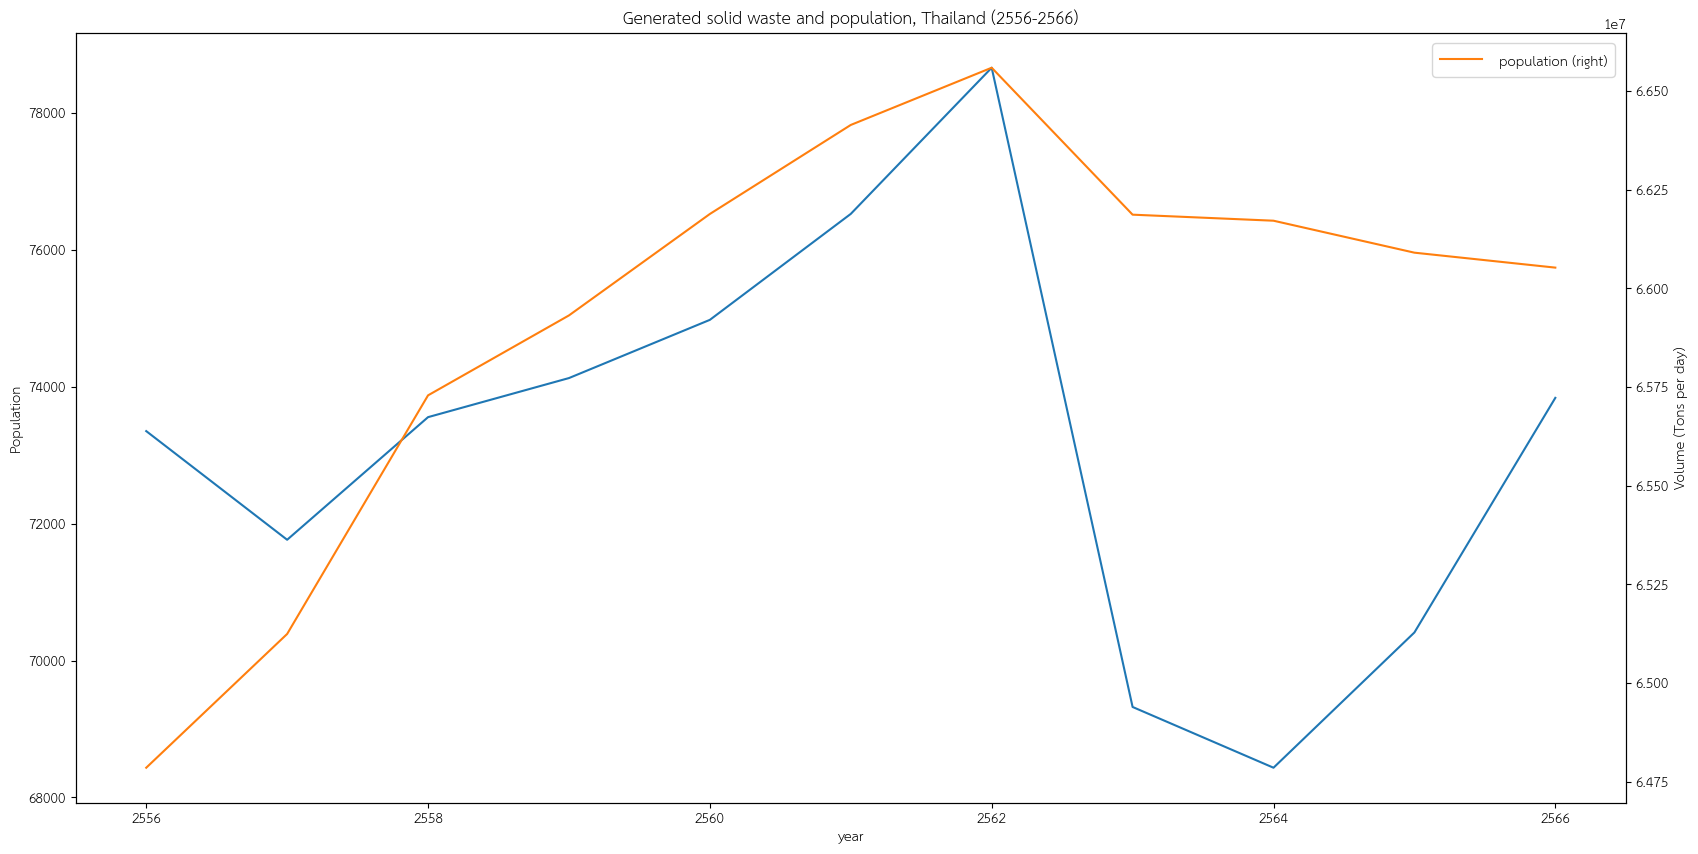

In [158]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(df1cat.index, df1cat['Generated solid waste'])
ax.legend()
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Year')
plt.ylabel('Population')

#ax.secondary_yaxis('right').set_ylabel('Population')
#plt.ylabel('Population')
plt.title('Generated solid waste and population, Thailand (2556-2566)')

pd.DataFrame({'population': [64785909,	65124716,	65729098,	65931550,	66188503,	66413979,	66558935,	66186727,	66171439,	66090475,	66052615]
              ,'year': [2556, 2557, 2558, 2559, 2560, 2561, 2562, 2563, 2564 ,2565, 2566]}) \
                .plot(x='year', ax=ax, secondary_y=True, legend=True).set_ylabel('Volume (Tons per day)')

Text(0.5, 1.0, 'Generated solid waste and population, Thailand (2556-2566)')

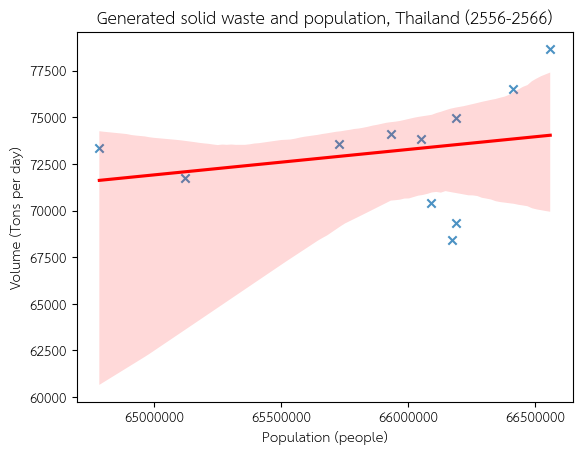

In [159]:
ax = sns.regplot(x=pd.DataFrame({'population': [64785909,	65124716,	65729098,	65931550,	66188503,	66413979,	66558935,	66186727,	66171439,	66090475,	66052615]}),
            y=df1cat['Generated solid waste'], marker="x", line_kws=dict(color="r"))
plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel('Population (people)')
plt.ylabel('Volume (Tons per day)')
plt.title('Generated solid waste and population, Thailand (2556-2566)')

### รายเขตกรุงเทพฯ

In [160]:
df4 = pd.read_csv(r'https://raw.githubusercontent.com/git1userjojo/DADS5001_midtermProject/refs/heads/main/data/cleaned/%E0%B8%9B%E0%B8%A3%E0%B8%B4%E0%B8%A1%E0%B8%B2%E0%B8%93%E0%B8%82%E0%B8%A2%E0%B8%B0%E0%B8%A1%E0%B8%B9%E0%B8%A5%E0%B8%9D%E0%B8%AD%E0%B8%A2%E0%B8%A3%E0%B8%B2%E0%B8%A2%E0%B9%80%E0%B8%82%E0%B8%952554_2567.csv') # freq=month
df4_pop = pd.read_csv(r'https://raw.githubusercontent.com/git1userjojo/DADS5001_midtermProject/refs/heads/main/data/cleaned/population_district.csv') # freq=month


In [161]:
# clean and group by year
df4 = df4.set_index('เขต').T.set_index(pd.date_range(start=pd.Timestamp(2553-543,10,1), end=pd.Timestamp(2565-543,9,1), freq='MS'))
for col in df4.columns:
    df4[col] = df4[col].str.replace(',','').str.strip()
df4 = df4.apply(pd.to_numeric)
display(df4.info())
df4 = df4.groupby([df4.index.year]).mean()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 2010-10-01 to 2022-09-01
Freq: MS
Data columns (total 51 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   คลองเตย            144 non-null    float64
 1   คลองสาน            144 non-null    float64
 2   คลองสามวา          144 non-null    float64
 3   คันนายาว           144 non-null    float64
 4   จตุจักร            144 non-null    float64
 5   จอมทอง             144 non-null    float64
 6   ดอนเมือง           144 non-null    float64
 7   ดินแดง             144 non-null    float64
 8   ดุสิต              144 non-null    float64
 9   ตลิ่งชัน           144 non-null    float64
 10  ทวีวัฒนา           144 non-null    float64
 11  ทุ่งครุ            144 non-null    float64
 12  ธนบุรี             144 non-null    float64
 13  บางกอกน้อย         144 non-null    float64
 14  บางกอกใหญ่         144 non-null    float64
 15  บางกะปิ            144 non-null    float64
 16

None

In [162]:
# slice อื่นๆ
df4_1 = df4.loc[:,df4.columns[:-1]]
df4_1

เขต,คลองเตย,คลองสาน,คลองสามวา,คันนายาว,จตุจักร,จอมทอง,ดอนเมือง,ดินแดง,ดุสิต,ตลิ่งชัน,...,วัฒนา,สวนหลวง,สะพานสูง,สัมพันธวงศ์,สาทร,สายไหม,หนองแขม,หนองจอก,หลักสี่,ห้วยขวาง
2010,8464.906667,3570.640000,3791.816667,3088.170000,10122.356667,5671.100000,4708.986667,6850.916667,5207.616667,3266.256667,...,6752.420000,5344.210000,2548.836667,1793.723333,4745.486667,4883.203333,4864.823333,2565.980000,4397.460000,4451.253333
2011,8781.634167,3737.139167,3862.085000,3110.254167,10239.146667,5858.131667,6101.698333,7167.167500,5406.291667,3507.105000,...,7280.835833,5901.789167,2840.386667,1785.431667,4803.760833,5444.382500,5073.370000,2753.267500,4637.470000,4695.871667
2012,9697.802500,3837.302500,4715.919167,3910.268333,11133.250000,5923.302500,5126.473333,7869.640000,5523.343333,3674.506667,...,8246.265000,6614.700000,3246.305833,1829.954167,5286.078333,5704.337500,5210.986667,3186.270000,4811.474167,5750.286667
2013,10429.535000,3833.263333,5115.711667,3853.586667,11207.933333,6131.055833,5095.850000,8277.099167,5354.618333,3743.365000,...,8713.158333,7036.472500,3522.644167,1776.854167,5286.560000,5640.429167,5193.992500,3365.559167,4710.010833,6080.546667
2014,10293.598333,3838.732500,5198.100833,3698.313333,11097.485833,6210.778333,5272.373333,8376.165000,5229.170000,3924.898333,...,8557.264167,7269.659167,3623.661667,1734.459167,5469.142500,5860.159167,5337.899167,3709.725000,4618.358333,6187.708333
2015,10258.862500,4089.655000,5475.941667,4066.344167,11513.708333,6246.780000,5616.365000,8085.455833,5298.392500,4051.857500,...,8820.870000,7197.835000,3605.629167,1759.860000,5504.128333,5975.005833,5284.324167,3592.618333,4798.798333,5839.415833
2016,9890.624167,3786.603333,5381.568333,4395.336667,12125.433333,5857.904167,5863.062500,8393.603333,5340.384167,4057.250833,...,8922.465000,7205.878333,3759.622500,1701.419167,5458.293333,6458.611667,4950.112500,3674.169167,5060.772500,6104.371667
2017,9473.843333,3823.908333,6041.688333,4341.438333,12790.175000,5981.100000,6153.672500,8699.324167,5277.649167,4355.565000,...,8894.170000,7239.828333,3864.761667,1717.891667,5485.237500,7017.735833,5188.017500,3993.577500,5465.825000,6467.679167
2018,9107.085000,3867.240833,6078.596667,4583.645000,13023.916667,6396.531667,6509.370000,8848.165833,5188.047500,4517.166667,...,8884.321667,7097.410833,3838.258333,1662.858333,4959.955833,7245.305833,5360.705833,4179.534167,5627.110000,6939.056667
2019,17217.598333,7635.949167,12392.147500,8676.897500,23697.811667,11926.411667,11994.001667,16574.079167,9639.134167,8479.871667,...,17851.436667,13497.944167,7191.641667,3200.815833,9564.967500,13340.148333,10189.230833,7876.316667,10290.293333,13117.948333


In [163]:
# add year and pivot table
df4_pop['year'] = ('20' + df4_pop['YYMM'].astype(str).str[:2]).astype(int)-43
df4_pop_piv = df4_pop[['year', 'RCODE-DESC', 'TOTAL']].pivot(index='year', columns='RCODE-DESC', values='TOTAL')
df4_pop_piv = df4_pop_piv[df4_1.columns].iloc[:-1]
for col in df4_pop_piv.columns:
    df4_pop_piv[col] = df4_pop_piv[col].str.replace(',','').str.strip()
df4_pop_piv = df4_pop_piv.apply(pd.to_numeric)
df4_pop_piv

RCODE-DESC,คลองเตย,คลองสาน,คลองสามวา,คันนายาว,จตุจักร,จอมทอง,ดอนเมือง,ดินแดง,ดุสิต,ตลิ่งชัน,...,วัฒนา,สวนหลวง,สะพานสูง,สัมพันธวงศ์,สาทร,สายไหม,หนองแขม,หนองจอก,หลักสี่,ห้วยขวาง
year,,,,,,,,,,,,,,,,,,,,,
2013,108066,75765,174197,90437,160948,157156,167827,128838,106811,106192,...,82637,116688,91358,26932,83898,191536,151877,159962,109049,78943
2014,107221,75224,178958,92094,160366,156030,168197,127260,104394,105857,...,83520,118371,92735,26359,82432,194511,153175,162598,107797,80002
2015,106233,74796,184306,94242,159514,155048,168278,125964,101576,105613,...,84214,120136,93854,25694,81745,197715,154389,165281,106657,80735
2016,104211,73871,189507,95369,158130,153668,168896,123966,98450,105289,...,84528,121740,94982,24785,80497,200374,155229,167844,105588,81190
2017,102945,73263,193930,96751,156684,152315,168973,122563,95852,105299,...,84967,122534,95537,24150,79624,202590,155722,170643,104701,81515
2018,101543,72171,198019,97187,155923,151174,169259,120761,94854,105047,...,85642,123026,95836,23655,78860,204532,156267,172990,104577,81689
2019,101244,71197,202094,97095,156605,150108,170021,119150,89769,104779,...,87225,124048,96059,22463,77773,206278,156354,176022,104285,84340
2020,93193,69139,204900,96330,155297,148290,170791,115508,83897,103617,...,81623,123609,96092,21324,75735,207272,156203,177979,102704,84233
2021,91636,67579,206437,95636,154146,145771,167921,112814,81494,102469,...,81382,122824,95922,20777,73987,206831,155360,178856,100534,83278


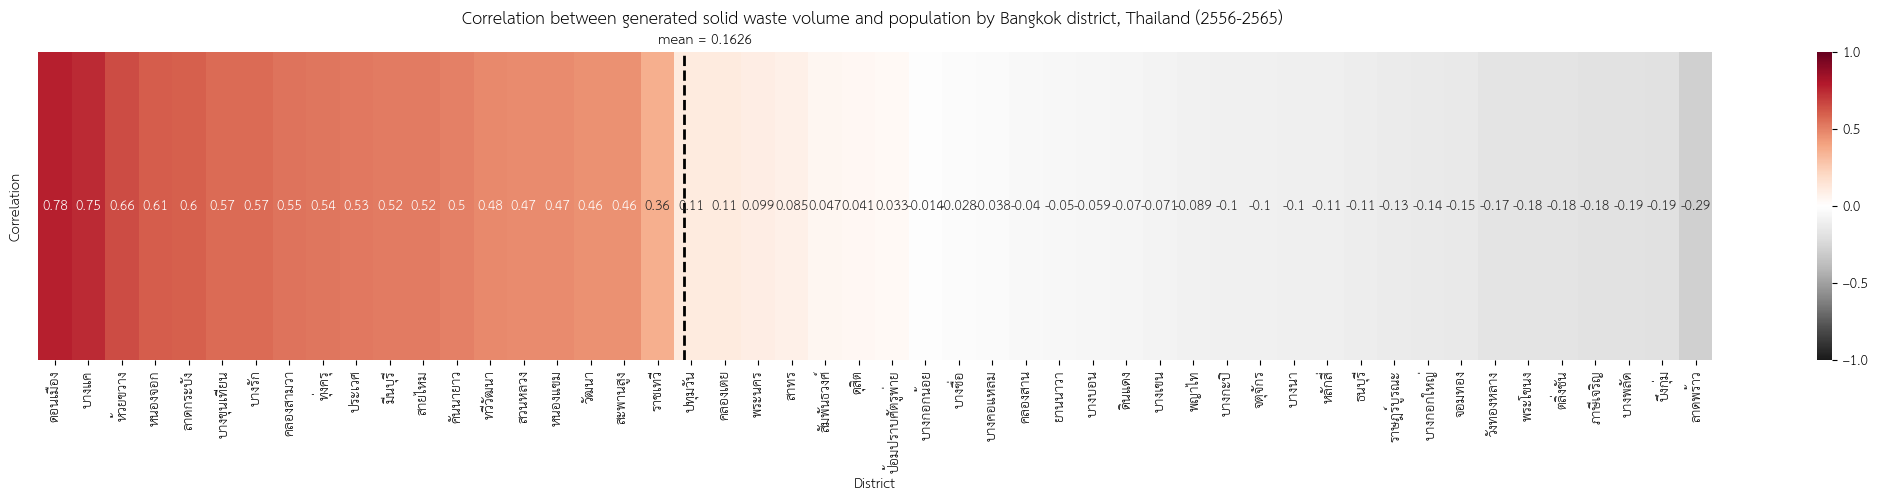

In [164]:
df4_1_cor = df4_1.iloc[3:]

fig= plt.figure(figsize=(27, 4))
ax = sns.heatmap(pd.DataFrame(df4_1_cor.corrwith(df4_pop_piv)).sort_values(0, ascending=False).T, \
                 annot=True, cmap='RdGy_r', vmin=-1, vmax=1)
ax.axvline(x=19.3, linewidth=2, color="black", linestyle='dashed')
ax.annotate(f'mean = {df4_1_cor.corrwith(df4_pop_piv).mean():.4f}\n', xy = (18.5, 0.02))

plt.tick_params(left = False)
plt.gca().set_yticklabels([])
plt.ylabel('Correlation')
plt.xlabel('District')
plt.title('Correlation between generated solid waste volume and population by Bangkok district, Thailand (2556-2565) \n')
plt.show()

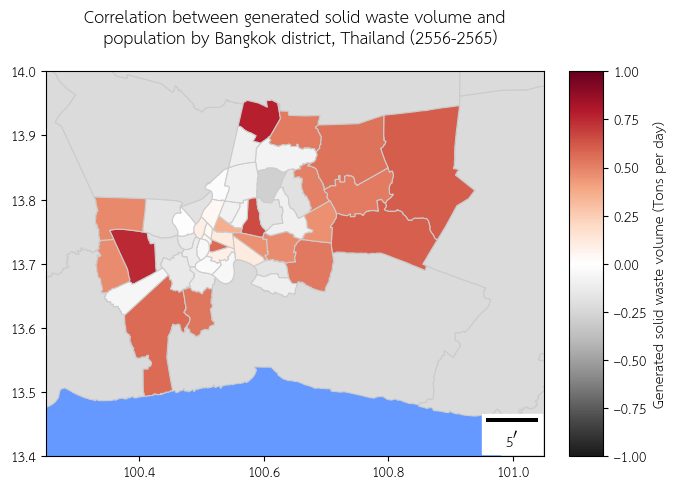

In [165]:
map_df_d_merge = map_df_d.merge(pd.DataFrame(df4_1_cor.corrwith(df4_pop_piv)).sort_values(0, ascending=False), left_on='ADM2_TH', right_on='เขต')

# plot
fig, ax = plt.subplots(1, figsize=(17, 5))
map_df_p.plot(ax=ax, color="#DBDBDB", edgecolor="0.8", linewidth=0.8)
map_df_d_merge.plot(column=0, cmap='RdGy_r', linewidth=0.8, ax=ax, edgecolor='0.8', vmin=-1, vmax=1)
# color bar
norm = plt.Normalize(-1, 1)
sm = plt.cm.ScalarMappable(cmap='RdGy_r', norm=norm)
sm.set_array([])
cax = fig.add_axes([ax.get_position().x1+0.1, ax.get_position().y0, 0.02, ax.get_position().height])
ax.figure.colorbar(sm, cax=cax, label='Generated solid waste volume (Tons per day)')
ax.add_artist(ScaleBar(1, dimension='angle', units='deg', location="lower right"))
# background color
ax.set_facecolor('#6699FF')
# set map extent
ax.set_xlim([100.25, 101.05])
ax.set_ylim([13.4, 14])
# map name
plt.title('Correlation between generated solid waste volume and \n population by Bangkok district, Thailand (2556-2565)', loc='center', pad=20).set_position([-8, 1.05])
plt.show()

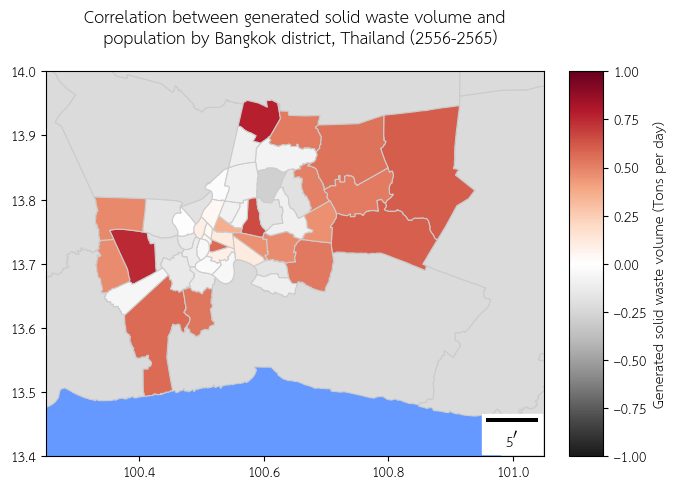

In [166]:
map_df_d_merge = map_df_d.merge(pd.DataFrame(df4_1_cor.corrwith(df4_pop_piv)).sort_values(0, ascending=False), left_on='ADM2_TH', right_on='เขต')

# plot
fig, ax = plt.subplots(1, figsize=(17, 5))
map_df_p.plot(ax=ax, color="#DBDBDB", edgecolor="0.8", linewidth=0.8)
map_df_d_merge.plot(column=0, cmap='RdGy_r', linewidth=0.8, ax=ax, edgecolor='0.8', vmin=-1, vmax=1)
# color bar
norm = plt.Normalize(-1, 1)
sm = plt.cm.ScalarMappable(cmap='RdGy_r', norm=norm)
sm.set_array([])
cax = fig.add_axes([ax.get_position().x1+0.1, ax.get_position().y0, 0.02, ax.get_position().height])
ax.figure.colorbar(sm, cax=cax, label='Generated solid waste volume (Tons per day)')
ax.add_artist(ScaleBar(1, dimension='angle', units='deg', location="lower right"))
# background color
ax.set_facecolor('#6699FF')
# set map extent
ax.set_xlim([100.25, 101.05])
ax.set_ylim([13.4, 14])
# map name
plt.title('Correlation between generated solid waste volume and \n population by Bangkok district, Thailand (2556-2565)', loc='center', pad=20).set_position([-8, 1.05])
plt.show()

In [167]:
from IPython.display import IFrame
def show_web_map(id):
    url = 'https://cpudgiportal.bangkok.go.th/portal/apps/webappviewer/index.html?id=' + id
    return IFrame(url, width='100%', height=500)
show_web_map('3ce8216cd37140409bcc99385a02bd21')

## ปริมาณขยะปี 2565

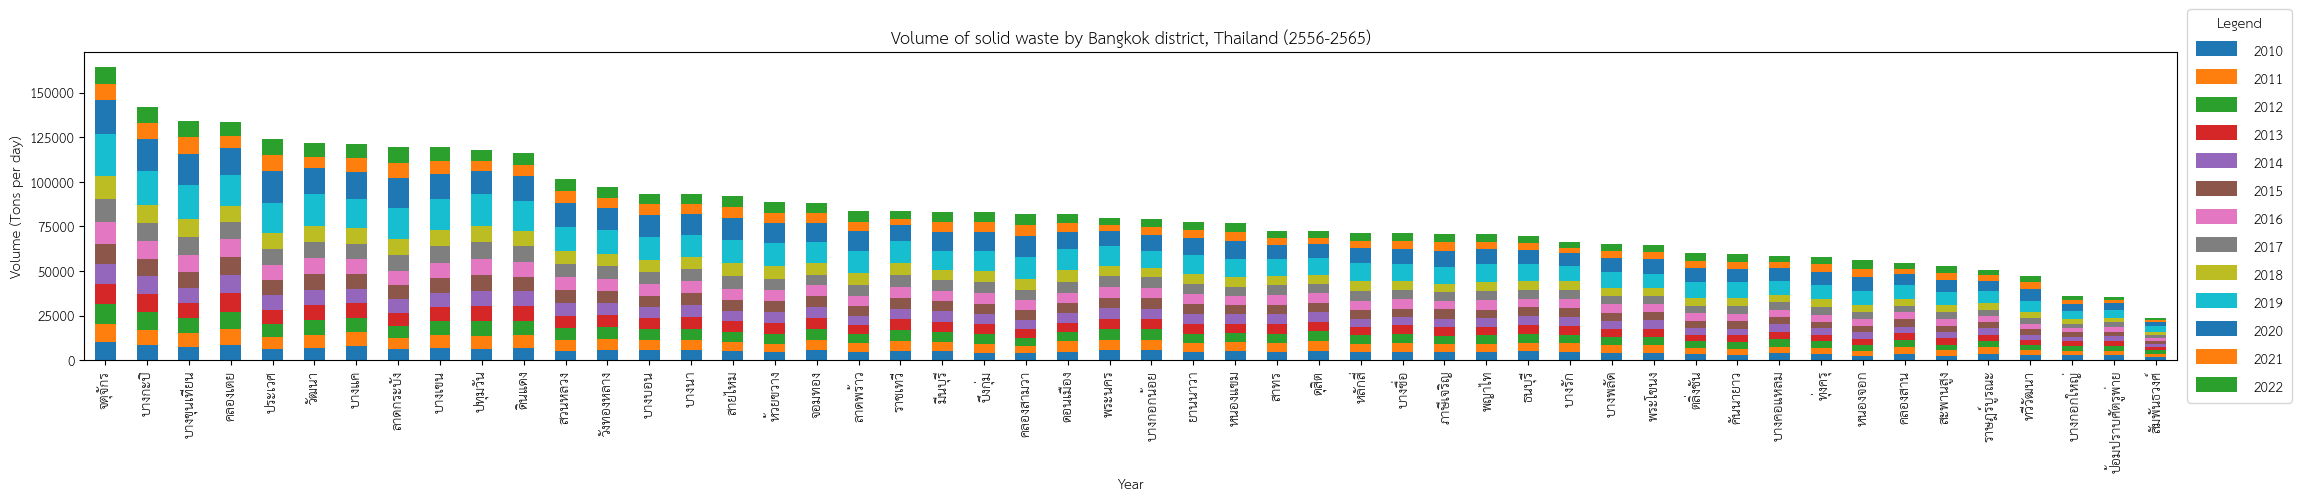

In [168]:
# ปริมาณขยะรายเขต
ax = df4_1[df4_1.sum().sort_values(ascending=False).index].T.plot(kind='bar', stacked=True, figsize=(27, 4))

plt.xlabel('Year')
plt.ylabel('Volume (Tons per day)')
plt.ticklabel_format(style='plain', axis='y')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title='Legend')
plt.title('Volume of solid waste by Bangkok district, Thailand (2556-2565)')

plt.show()

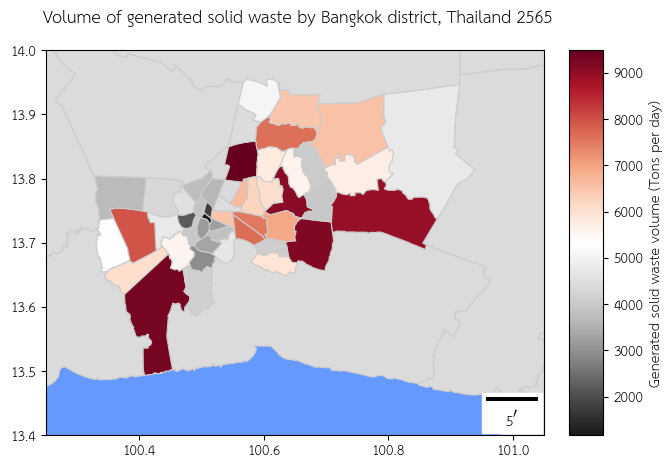

In [169]:
map_df_d_merge = map_df_d.merge(df4_1.iloc[-1].reset_index(), left_on='ADM2_TH', right_on='เขต')

# plot
fig, ax = plt.subplots(1, figsize=(17, 5))
map_df_p.plot(ax=ax, color="#DBDBDB", edgecolor="0.8", linewidth=0.8)
map_df_d_merge.plot(column=2022, cmap='RdGy_r', linewidth=0.8, ax=ax, edgecolor='0.8')
# color bar
norm = plt.Normalize(map_df_d_merge[2022].min(), map_df_d_merge[2022].max())
sm = plt.cm.ScalarMappable(cmap='RdGy_r', norm=norm)
sm.set_array([])
cax = fig.add_axes([ax.get_position().x1+0.1, ax.get_position().y0, 0.02, ax.get_position().height])
ax.figure.colorbar(sm, cax=cax, label='Generated solid waste volume (Tons per day)')
ax.add_artist(ScaleBar(1, dimension='angle', units='deg', location="lower right"))
# background color
ax.set_facecolor('#6699FF')
# set map extent
ax.set_xlim([100.25, 101.05])
ax.set_ylim([13.4, 14])
# map name
plt.title('Volume of generated solid waste by Bangkok district, Thailand 2565', loc='center', pad=20).set_position([-8, 1.05])
plt.show()

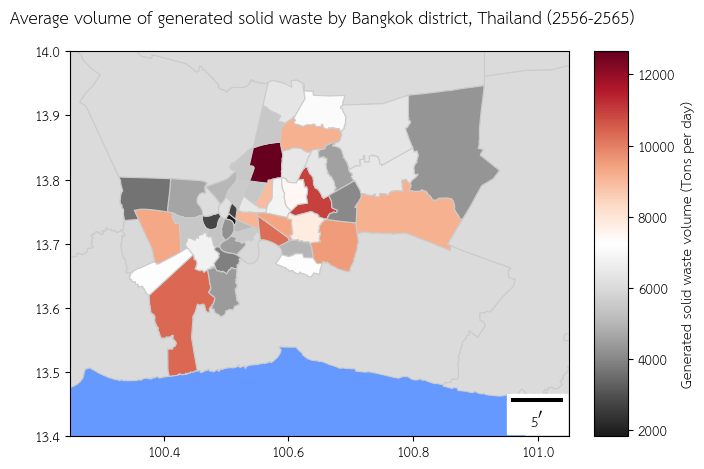

In [170]:
map_df_d_merge = map_df_d.merge(df4_1.mean().reset_index(), left_on='ADM2_TH', right_on='เขต')

# plot
fig, ax = plt.subplots(1, figsize=(17, 5))
map_df_p.plot(ax=ax, color="#DBDBDB", edgecolor="0.8", linewidth=0.8)
map_df_d_merge.plot(column=0, cmap='RdGy_r', linewidth=0.8, ax=ax, edgecolor='0.8')
# color bar
norm = plt.Normalize(map_df_d_merge[0].min(), map_df_d_merge[0].max())
sm = plt.cm.ScalarMappable(cmap='RdGy_r', norm=norm)
sm.set_array([])
cax = fig.add_axes([ax.get_position().x1+0.1, ax.get_position().y0, 0.02, ax.get_position().height])
ax.figure.colorbar(sm, cax=cax, label='Generated solid waste volume (Tons per day)')
ax.add_artist(ScaleBar(1, dimension='angle', units='deg', location="lower right"))
# background color
ax.set_facecolor('#6699FF')
# set map extent
ax.set_xlim([100.25, 101.05])
ax.set_ylim([13.4, 14])
# map name
plt.title('Average volume of generated solid waste by Bangkok district, Thailand (2556-2565)', loc='center', pad=20).set_position([-8, 1.05])
plt.show()

In [171]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3850 entries, 0 to 3849
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Solid waste   3850 non-null   object 
 1   Province      3850 non-null   object 
 2   Unit Measure  3850 non-null   object 
 3   TIME_PERIOD   3850 non-null   int64  
 4   OBS_VALUE     3850 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 150.5+ KB


In [172]:
df2

,Solid waste,Province,Unit Measure,TIME_PERIOD,OBS_VALUE
0,Accumulated solid waste,Chai Nat,Tonnes,2556,346092.00
1,Accumulated solid waste,Chai Nat,Tonnes,2557,226764.69
2,Accumulated solid waste,Chai Nat,Tonnes,2558,132590.41
3,Accumulated solid waste,Chai Nat,Tonnes,2559,20013.00
4,Accumulated solid waste,Chai Nat,Tonnes,2560,10438.00
...,...,...,...,...,...
3845,Properly disposed solid waste,Narathiwat,Tons per day,2561,108.81
3846,Properly disposed solid waste,Narathiwat,Tons per day,2562,95.92
3847,Properly disposed solid waste,Narathiwat,Tons per day,2563,101.00
3848,Properly disposed solid waste,Narathiwat,Tons per day,2564,100.00


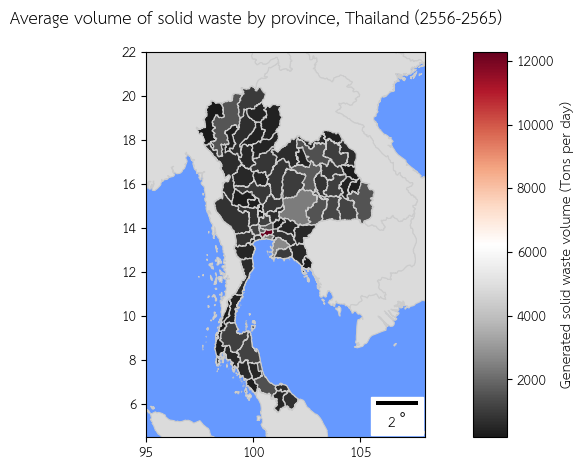

In [173]:
map_df_p_merge = map_df_p.merge(df2[df2['Solid waste']=='Generated solid waste'][['Province', 'OBS_VALUE']].groupby('Province').mean().reset_index(), left_on='ADM1_EN', right_on='Province')
# plot
fig, ax = plt.subplots(1, figsize=(17, 5))
map_df_oa.plot(ax=ax, color="#DBDBDB", edgecolor="0.8", linewidth=0.8)
map_df_p_merge.plot(column='OBS_VALUE', cmap='RdGy_r', linewidth=0.8, ax=ax, edgecolor='0.8')
norm = plt.Normalize(map_df_p_merge['OBS_VALUE'].min(), \
                     map_df_p_merge['OBS_VALUE'].max())
# color bar
sm = plt.cm.ScalarMappable(cmap='RdGy_r', norm=norm)
sm.set_array([])
cax = fig.add_axes([ax.get_position().x1-0.25, ax.get_position().y0, 0.02, ax.get_position().height])
ax.figure.colorbar(sm, cax=cax, label='Generated solid waste volume (Tons per day)')
ax.add_artist(ScaleBar(1, dimension='angle', units='deg', location="lower right"))
# background color
ax.set_facecolor('#6699FF')
# set map extent
ax.set_xlim([95, 108])
ax.set_ylim([4.5, 22])
# map name
plt.title('Average volume of solid waste by province, Thailand (2556-2565) \n', loc='right')
plt.show()

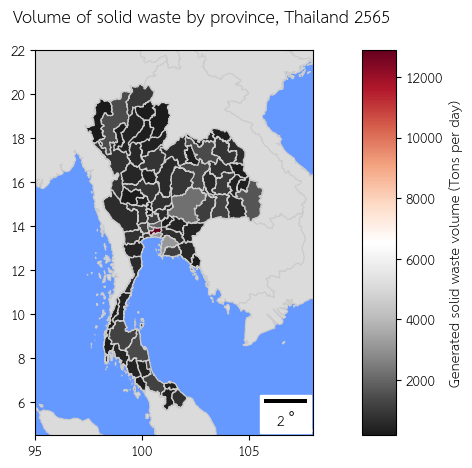

In [174]:
map_df_p_merge = map_df_p.merge(df2, left_on='ADM1_EN', right_on='Province')
map_df_p_merge = map_df_p_merge[map_df_p_merge['Solid waste']=='Generated solid waste']
# plot
fig, ax = plt.subplots(1, figsize=(17, 5))
map_df_oa.plot(ax=ax, color="#DBDBDB", edgecolor="0.8", linewidth=0.8)
map_df_p_merge[map_df_p_merge['TIME_PERIOD']==2565].plot(column='OBS_VALUE', cmap='RdGy_r', linewidth=0.8, ax=ax, edgecolor='0.8')
norm = plt.Normalize(map_df_p_merge[map_df_p_merge['TIME_PERIOD']==2565]['OBS_VALUE'].min(), \
                     map_df_p_merge[map_df_p_merge['TIME_PERIOD']==2565]['OBS_VALUE'].max())
# color bar
sm = plt.cm.ScalarMappable(cmap='RdGy_r', norm=norm)
sm.set_array([])
cax = fig.add_axes([ax.get_position().x1-0.25, ax.get_position().y0, 0.02, ax.get_position().height])
ax.figure.colorbar(sm, cax=cax, label='Generated solid waste volume (Tons per day)')
ax.add_artist(ScaleBar(1, dimension='angle', units='deg', location="lower right"))
# background color
ax.set_facecolor('#6699FF')
# set map extent
ax.set_xlim([95, 108])
ax.set_ylim([4.5, 22])
# map name
plt.title('Volume of solid waste by province, Thailand 2565 \n', loc='right')
plt.show()

In [175]:
df2_mean_all = df2[df2['Solid waste']=='Generated solid waste'][['Province', 'OBS_VALUE']].groupby('Province').mean().mean().values

,Province,OBS_VALUE
0,Krung Thep Maha Nakhon (Bangkok),12270.167
1,Chon Buri,2644.320
2,Nakhon Ratchasima,2399.444
3,Samut Prakan,2360.550
4,Nonthaburi,1779.559
5,Khon Kaen,1697.232
6,Pathum Thani,1657.848
7,Chiang Mai,1599.399
8,Ubon Ratchathani,1546.169
9,Buri Ram,1508.753


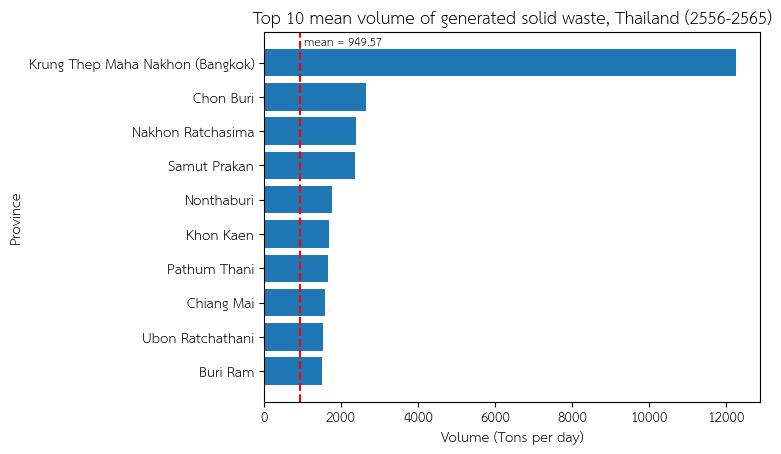

In [176]:
# top 10 mean 
df2_mean = df2[df2['Solid waste']=='Generated solid waste'][['Province', 'OBS_VALUE']].groupby('Province').mean().reset_index().sort_values('OBS_VALUE', ascending=False)[:10]
display(df2_mean.reset_index(drop=True))
plt.barh(df2_mean['Province'][::-1], df2_mean['OBS_VALUE'][::-1])
plt.axvline(df2_mean_all, linestyle='dashed', c='red')

plt.annotate(f'mean = {float(df2_mean_all):.2f}', xy = (df2_mean_all+ 100, 9.5), fontsize="small")

plt.ylabel('Province')
plt.xlabel('Volume (Tons per day)')
#ax.legend(["Volume"], loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('Top 10 mean volume of generated solid waste, Thailand (2556-2565)')
plt.show()

,Solid waste,Province,Unit Measure,TIME_PERIOD,OBS_VALUE
150,Generated solid waste,Nonthaburi,Tons per day,2556,1541.73
151,Generated solid waste,Nonthaburi,Tons per day,2557,1617.00
152,Generated solid waste,Nonthaburi,Tons per day,2558,1624.00
153,Generated solid waste,Nonthaburi,Tons per day,2559,1679.23
154,Generated solid waste,Nonthaburi,Tons per day,2560,1685.00
...,...,...,...,...,...
3495,Generated solid waste,Chon Buri,Tons per day,2561,2591.03
3496,Generated solid waste,Chon Buri,Tons per day,2562,2909.86
3497,Generated solid waste,Chon Buri,Tons per day,2563,2683.70
3498,Generated solid waste,Chon Buri,Tons per day,2564,2750.00


Text(0.5, 1.0, 'Volume of solid waste, Thailand (2556-2566)')

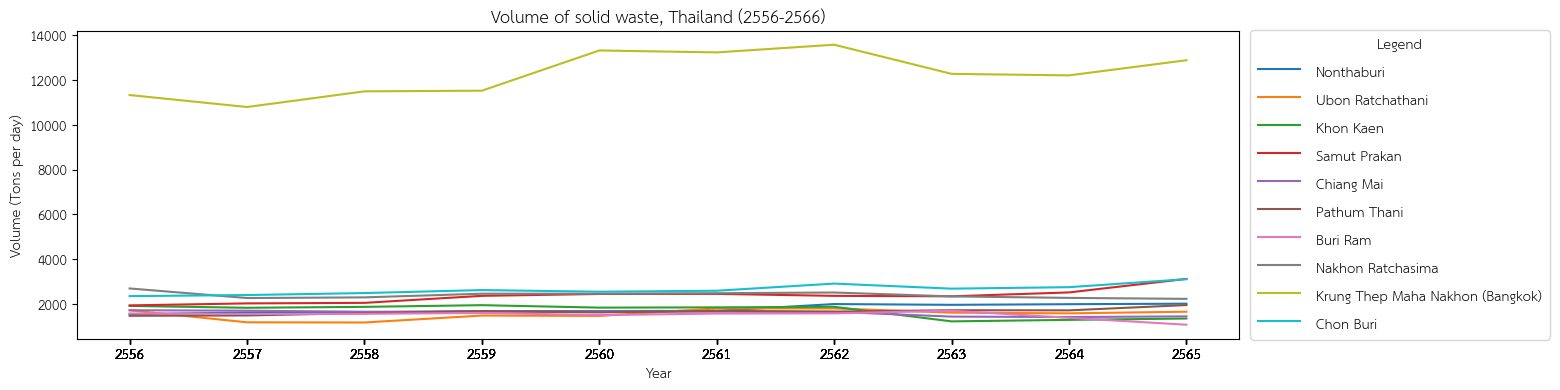

In [177]:
df2_top10 = df2[df2['Province'].isin(df2_mean['Province'].values.tolist())]
df2_top10 = df2_top10[df2_top10['Solid waste']=='Generated solid waste' ]
display(df2_top10)
plt.figure(figsize=(15, 4))
sns.lineplot(data=df2_top10, x='TIME_PERIOD', y='OBS_VALUE', hue = df2_top10['Province'], markers=True)
plt.xticks(df2_top10['TIME_PERIOD'])
plt.xlabel('Year')
plt.ylabel('Volume (Tons per day)')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title='Legend')
plt.title('Volume of solid waste, Thailand (2556-2566)')

In [178]:
df2_2565 = df2[df2['Solid waste']=='Generated solid waste'][df2['TIME_PERIOD']==2565].sort_values('OBS_VALUE', ascending=False)
df2_2565.reset_index(drop=True)

,Solid waste,Province,Unit Measure,TIME_PERIOD,OBS_VALUE
0,Generated solid waste,Krung Thep Maha Nakhon (Bangkok),Tons per day,2565,12890.0
1,Generated solid waste,Samut Prakan,Tons per day,2565,3120.0
2,Generated solid waste,Chon Buri,Tons per day,2565,3107.0
3,Generated solid waste,Nakhon Ratchasima,Tons per day,2565,2228.0
4,Generated solid waste,Nonthaburi,Tons per day,2565,2012.0
...,...,...,...,...,...
72,Generated solid waste,Mae Hong Son,Tons per day,2565,195.0
73,Generated solid waste,Trat,Tons per day,2565,191.0
74,Generated solid waste,Samut Songkhram,Tons per day,2565,190.0
75,Generated solid waste,Sing Buri,Tons per day,2565,186.0


In [179]:
# top 10
df2_2565[:10]

,Solid waste,Province,Unit Measure,TIME_PERIOD,OBS_VALUE
3489,Generated solid waste,Krung Thep Maha Nakhon (Bangkok),Tons per day,2565,12890.0
1079,Generated solid waste,Samut Prakan,Tons per day,2565,3120.0
3499,Generated solid waste,Chon Buri,Tons per day,2565,3107.0
3249,Generated solid waste,Nakhon Ratchasima,Tons per day,2565,2228.0
159,Generated solid waste,Nonthaburi,Tons per day,2565,2012.0
1609,Generated solid waste,Pathum Thani,Tons per day,2565,1950.0
529,Generated solid waste,Ubon Ratchathani,Tons per day,2565,1654.0
1109,Generated solid waste,Chiang Mai,Tons per day,2565,1445.0
859,Generated solid waste,Nakhon Si Thammarat,Tons per day,2565,1402.0
839,Generated solid waste,Udon Thani,Tons per day,2565,1368.0


Text(0.5, 1.0, 'Volume of Generated solid waste, Thailand (2565)')

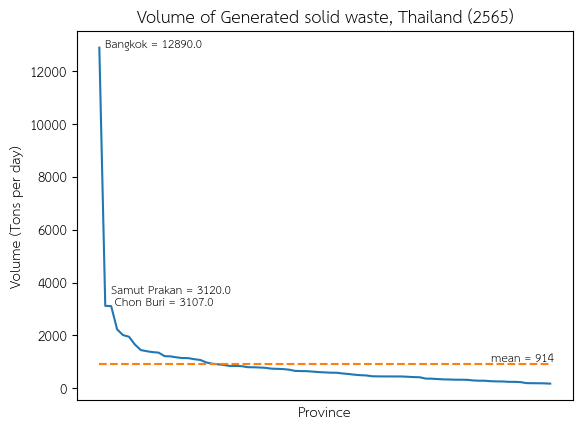

In [180]:
fig, ax = plt.subplots()
#sns.lineplot(data=df2_2565, x='Province',y='OBS_VALUE')
ax.plot(df2_2565['Province'], df2_2565['OBS_VALUE'])
ax.plot(df2_2565['Province'], [df2_2565['OBS_VALUE'].mean()]*len(df2_2565['Province']), linestyle='dashed')
#ax.plot(df2_2565['Province'], [df2_2565['OBS_VALUE'].median()]*len(df2_2565['Province']), linestyle='dashed')

ax.annotate(f'mean = {round(df2_2565['OBS_VALUE'].mean())}', xy = (df2_2565['Province'][-11:-10], df2_2565['OBS_VALUE'].mean()+100), fontsize="small")
#ax.annotate(f'median = {round(df2_2565['OBS_VALUE'].median())}', xy = (df2_2565['Province'][-11:-10], df2_2565['OBS_VALUE'].median()), fontsize="small")

ax.annotate(f'Bangkok = {df2_2565['OBS_VALUE'][:1].values[0]}', xy = (df2_2565['Province'][1:2], df2_2565['OBS_VALUE'][:1]), fontsize="small")
ax.annotate(f'Samut Prakan = {df2_2565['OBS_VALUE'][1:2].values[0]} \n Chon Buri = {df2_2565['OBS_VALUE'][2:3].values[0]}'
            , xy = (df2_2565['Province'][2:3], df2_2565['OBS_VALUE'][1:2]), fontsize="small")

plt.tick_params(bottom = False)
plt.gca().set_xticklabels([])
plt.xticks(visible=False)
plt.xlabel('Province')
plt.ylabel('Volume (Tons per day)')
#ax.legend(["Volume"], loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('Volume of Generated solid waste, Thailand (2565)')

# ในปี 2565 แสดงให้เห็นว่ากรุงเทพเป็นอันดับหนึ่ง

## สถานที่จัดการขยะเพียงพอไหม

In [181]:
df3 = pd.read_csv('https://raw.githubusercontent.com/git1userjojo/DADS5001_midtermProject/refs/heads/main/data/cleaned/landfill2565.csv')
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2168 entries, 0 to 2167
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   _id                     2168 non-null   int64  
 1   Province_E              2168 non-null   object 
 2   Province                2168 non-null   object 
 3   Disposal name           2168 non-null   object 
 4   Address                 2168 non-null   object 
 5   Operator Name           2168 non-null   object 
 6   Latitude                2168 non-null   object 
 7   longitude               2168 non-null   float64
 8   Disposal Process        2168 non-null   object 
 9   area(m^2)               2168 non-null   float64
 10  Disposal Process group  2168 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 186.4+ KB


In [182]:
df3

,_id,Province_E,Province,Disposal name,Address,Operator Name,Latitude,longitude,Disposal Process,area(m^2),Disposal Process group
0,1,Lampang,ลำปาง,สถานที่กำจัดขยะมูลฝอย ทน.ลำปาง,ม.2 ต.กล้วยแพะ อ.เมืองลำปาง จ.ลำปาง,ทน.ลำปาง,18.177,99.5056,ฝังกลบ,992000.0,Landfilling
1,2,Lampang,ลำปาง,สถานที่กำจัดขยะมูลฝอย ทต.ไหล่หิน,บ้านแม่ฮวก ม.3 ต.ไหล่หิน อ.เกาะคา จ.ลำปาง 52130,ทต.ไหล่หิน,18.2049,99.3211,เทกอง,11200.0,Dumping
2,3,Lampang,ลำปาง,สถานที่กำจัดขยะมูลฝอย ทต.นาแก้ว หมู่3,บ้านสบต๋ำ ม.3 ต.นาแก้ว อ.เกาะคา จ.ลำปาง 52130,ทต.นาแก้ว,18.1102,99.3062,เทกอง,7680.0,Dumping
3,4,Lampang,ลำปาง,สถานที่กำจัดขยะมูลฝอย ทต.นาแก้ว หมู่4,บ้านนาแก้ว ม.4 ต.นาแก้ว อ.เกาะคา จ.ลำปาง 52130,ทต.นาแก้ว,18.1102,99.3061,เทกอง,6400.0,Dumping
4,5,Lampang,ลำปาง,สถานที่กำจัดขยะมูลฝอย ทต.นาแก้ว หมู่2,บ้านสองแควใต้ ม.2 ต.นาแก้ว อ.เกาะคา จ.ลำปาง,ทต.นาแก้ว,18.143,99.3373,เทกอง,8608.0,Dumping
...,...,...,...,...,...,...,...,...,...,...,...
2163,2164,Krung Thep Maha Nakhon (Bangkok),กรุงเทพมหานคร,สถานีขนถ่ายรัชวิภา,ถนนวิภาวดีรังสิต แขวงลาดยาว เขตจตุจักร กรุงเทพ...,บ.ลำเลียงชัย,13.8315,100.5563,สถานีขนถ่ายขยะมูลฝอย,0.0,Transfer & Mixed Methods
2164,2165,Krung Thep Maha Nakhon (Bangkok),กรุงเทพมหานคร,สถานที่กำจัดขยะมูลฝอย เอกชนหมักทำปุ๋ย 1000,ซอยอ่อนนุช 86 แขวงประเวศ เขตประเวศ กทม. 10250,กรุงเทพธนาคม,13.714,100.6820,หมักทำปุ๋ย,16000.0,Biological treatment
2165,2166,Krung Thep Maha Nakhon (Bangkok),กรุงเทพมหานคร,สถานที่กำจัดขยะมูลฝอย เอกชนหมักทำปุ๋ย 600,ซอยอ่อนนุช 86 แขวงประเวศ เขตประเวศ กทม. 10250,กรุงเทพธนาคม,13.714,100.6820,หมักทำปุ๋ย,16000.0,Biological treatment
2166,2167,Krung Thep Maha Nakhon (Bangkok),กรุงเทพมหานคร,สถานที่กำจัดขยะมูลฝอย เอกชน MBT และหมักทำก๊าซ,ซอยอ่อนนุช 86 แขวงประเวศ เขตประเวศ กทม. 10250,กรุงเทพธนาคม,13.7089,100.6844,หมักทำปุ๋ย,16000.0,Biological treatment


In [183]:
# top 10 or 5 graph
df3.groupby('Province_E')['area(m^2)'].sum().reset_index()

,Province_E,area(m^2)
0,Amnat Charoen,288000.0
1,Ang Thong,143996.0
2,Bueng Kan,280800.0
3,Buri Ram,1210212.0
4,Chachoengsao,2799596.0
...,...,...
72,Udon Thani,1868080.0
73,Uthai Thani,267128.0
74,Uttaradit,422584.0
75,Yala,521600.0


In [184]:
# top 10 or 5 graph
df3.groupby('Province_E')['area(m^2)'].sum().reset_index()

,Province_E,area(m^2)
0,Amnat Charoen,288000.0
1,Ang Thong,143996.0
2,Bueng Kan,280800.0
3,Buri Ram,1210212.0
4,Chachoengsao,2799596.0
...,...,...
72,Udon Thani,1868080.0
73,Uthai Thani,267128.0
74,Uttaradit,422584.0
75,Yala,521600.0


In [185]:
# top 10 or 5 graph
df3_count = df3['Province_E'].value_counts().reset_index()
df3_count

,Province_E,count
0,Khon Kaen,168
1,Mae Hong Son,100
2,Nakhon Ratchasima,88
3,Lampang,84
4,Chaiyaphum,79
...,...,...
72,Samut Prakan,2
73,Ang Thong,1
74,Samut Songkhram,1
75,Nonthaburi,1


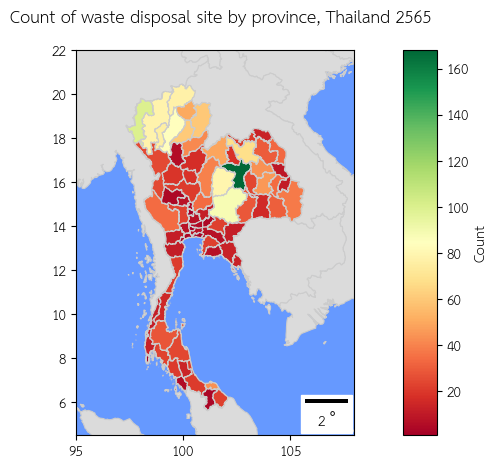

In [186]:
# น่องไก่ 1 all type
map_df_p_merge = map_df_p.merge(df3_count, left_on='ADM1_EN', right_on='Province_E')
#map_df_p_merge = map_df_p_merge[map_df_p_merge['Solid waste']=='Generated solid waste']
# plot
fig, ax = plt.subplots(1, figsize=(17, 5))
map_df_oa.plot(ax=ax, color="#DBDBDB", edgecolor="0.8", linewidth=0.8)
map_df_p_merge.plot(column='count', cmap='RdYlGn', linewidth=0.8, ax=ax, edgecolor='0.8')
norm = plt.Normalize(map_df_p_merge['count'].min(), \
                     map_df_p_merge['count'].max())
# color bar
sm = plt.cm.ScalarMappable(cmap='RdYlGn', norm=norm)
sm.set_array([])
cax = fig.add_axes([ax.get_position().x1-0.25, ax.get_position().y0, 0.02, ax.get_position().height])
ax.figure.colorbar(sm, cax=cax, label='Count')
ax.add_artist(ScaleBar(1, dimension='angle', units='deg', location="lower right"))
# background color
ax.set_facecolor('#6699FF')
# set map extent
ax.set_xlim([95, 108])
ax.set_ylim([4.5, 22])
# map name
plt.title('Count of waste disposal site by province, Thailand 2565 \n', loc='right')
plt.show()

In [187]:
df3['Province_E'].value_counts().reset_index()['count'].mean()
# เฉลี่ยมีจังหวัดละ 28 แห่ง

28.155844155844157

In [188]:
df3['Disposal Process'].value_counts().reset_index() 
# WTE -> waste to energy
# RDF -> Refuse Derived Fuel
# MBT -> Mechanical biological treatment

,Disposal Process,count
0,เทกอง,1707
1,เทกองควบคุมน้อยกว่า50ตัน,177
2,ฝังกลบ,70
3,เผาในเตา,63
4,เผากลางแจ้ง,35
5,อื่นๆ,35
6,สถานีขนถ่ายขยะมูลฝอย,31
7,ผสมผสาน,20
8,WTE,8
9,RDF,7


In [189]:
df3['Disposal Process group'].value_counts().reset_index() 

,Disposal Process group,count
0,Dumping,1888
1,Inceration,99
2,Transfer & Mixed Methods,86
3,Landfilling,70
4,Waste to energy & Alternative Fuel,20
5,Biological treatment,5


In [190]:
df3['Disposal Process group'].value_counts().reset_index()

,Disposal Process group,count
0,Dumping,1888
1,Inceration,99
2,Transfer & Mixed Methods,86
3,Landfilling,70
4,Waste to energy & Alternative Fuel,20
5,Biological treatment,5


Text(0.5, 1.0, 'Number of solid waste site by disposal process, Thailand (2565)')

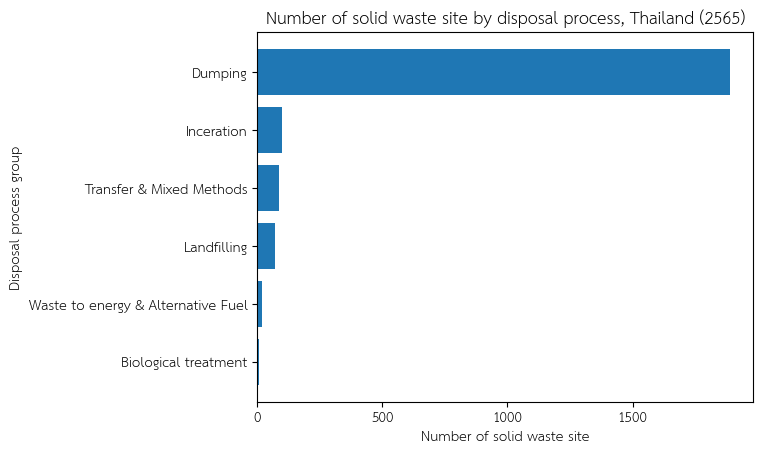

In [191]:
fig, ax = plt.subplots()
ax.barh(width=df3['Disposal Process group'].value_counts().reset_index().sort_values('count')['count'], \
        y=df3['Disposal Process group'].value_counts().reset_index().sort_values('count')['Disposal Process group'])
plt.ylabel('Disposal process group')
plt.xlabel('Number of solid waste site')
#ax.legend(["Volume"], loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('Number of solid waste site by disposal process, Thailand (2565)')

Text(0.5, 1.0, 'Number of solid waste site by disposal process subgroup, Thailand (2565)')

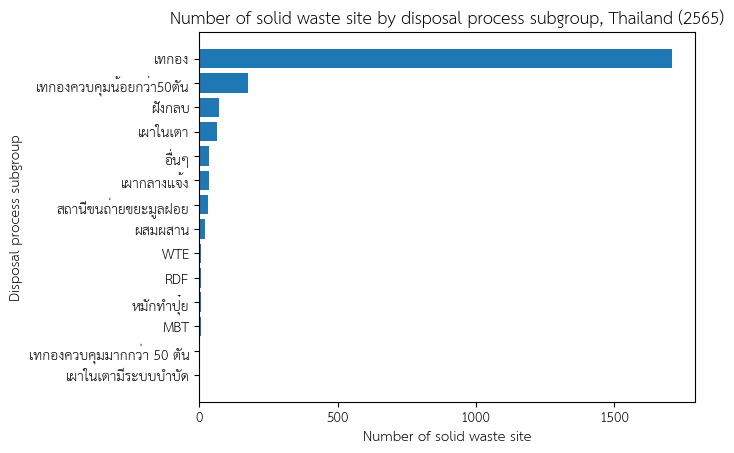

In [192]:
fig, ax = plt.subplots()
ax.barh(width=df3['Disposal Process'].value_counts().reset_index().sort_values('count')['count'], \
        y=df3['Disposal Process'].value_counts().reset_index().sort_values('count')['Disposal Process'])
plt.ylabel('Disposal process subgroup')
plt.xlabel('Number of solid waste site')
#ax.legend(["Volume"], loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('Number of solid waste site by disposal process subgroup, Thailand (2565)')

In [193]:
df3_count = pd.DataFrame()
df3_count[['Province_E','count']] = df3['Province_E'].value_counts().reset_index() 
df3_count = df3_count.merge(df3.groupby('Province_E')['area(m^2)'].sum().reset_index(), on='Province_E')
df3_merge = df3_count.merge(df2_2565, left_on='Province_E', right_on='Province')
df3_merge['volume per area(ton per day per m^2)'] = df3_merge['OBS_VALUE']/df3_merge['area(m^2)']
df3_merge = df3_merge.sort_values('volume per area(ton per day per m^2)', ascending=False).reset_index(drop=True)
df3_merge

,Province_E,count,area(m^2),Solid waste,Province,Unit Measure,TIME_PERIOD,OBS_VALUE,volume per area(ton per day per m^2)
0,Krung Thep Maha Nakhon (Bangkok),8,80000.0,Generated solid waste,Krung Thep Maha Nakhon (Bangkok),Tons per day,2565,12890.0,0.161125
1,Samut Songkhram,1,16000.0,Generated solid waste,Samut Songkhram,Tons per day,2565,190.0,0.011875
2,Pathum Thani,5,239964.0,Generated solid waste,Pathum Thani,Tons per day,2565,1950.0,0.008126
3,Nakhon Pathom,8,296000.0,Generated solid waste,Nakhon Pathom,Tons per day,2565,1144.0,0.003865
4,Samut Sakhon,3,291200.0,Generated solid waste,Samut Sakhon,Tons per day,2565,908.0,0.003118
...,...,...,...,...,...,...,...,...,...
72,Chiang Mai,78,4379304.0,Generated solid waste,Chiang Mai,Tons per day,2565,1445.0,0.000330
73,Phetchabun,40,1827596.0,Generated solid waste,Phetchabun,Tons per day,2565,587.0,0.000321
74,Chachoengsao,7,2799596.0,Generated solid waste,Chachoengsao,Tons per day,2565,704.0,0.000251
75,Trat,13,900252.0,Generated solid waste,Trat,Tons per day,2565,191.0,0.000212


In [194]:
df3_merge[['Province_E','volume per area(ton per day per m^2)']][:10]
# แสดงให้เห็นว่ากรุงเทพยังคงเป็นอันดับหนึ่ง มีพื้้นที่กำจัดขยะภายในจังหวัดน้อยไป ต้องเสียค่าขนส่งไปต่างจังหวัด มลพิษกระจายตัวระหว่างขนส่ง ผลเสียมี...

,Province_E,volume per area(ton per day per m^2)
0,Krung Thep Maha Nakhon (Bangkok),0.161125
1,Samut Songkhram,0.011875
2,Pathum Thani,0.008126
3,Nakhon Pathom,0.003865
4,Samut Sakhon,0.003118
5,Samut Prakan,0.003037
6,Nonthaburi,0.002664
7,Surin,0.002565
8,Mukdahan,0.002134
9,Sing Buri,0.002015


In [195]:
df3_dispos_count = df3.groupby(['Province_E', 'Disposal Process group']).count().iloc[:,:1].reset_index().rename(columns={'_id':'count'})

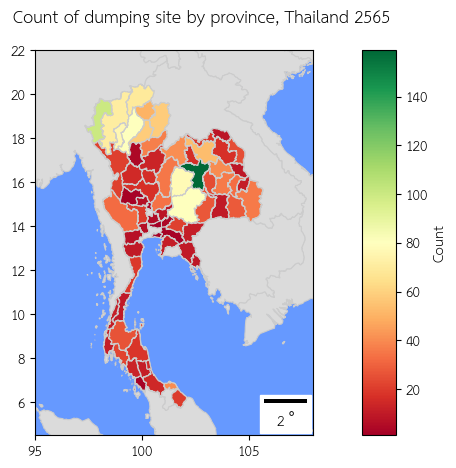

In [196]:
# น่องไก่ 1
map_df_p_merge = map_df_p.merge(df3_dispos_count, left_on='ADM1_EN', right_on='Province_E')
#map_df_p_merge = map_df_p_merge[map_df_p_merge['Solid waste']=='Generated solid waste']
# plot
fig, ax = plt.subplots(1, figsize=(17, 5))
map_df_oa.plot(ax=ax, color="#DBDBDB", edgecolor="0.8", linewidth=0.8)
map_df_p_merge[map_df_p_merge['Disposal Process group']=='Dumping'].plot(column='count', cmap='RdYlGn', linewidth=0.8, ax=ax, edgecolor='0.8')
norm = plt.Normalize(map_df_p_merge['count'].min(), \
                     map_df_p_merge['count'].max())
# color bar
sm = plt.cm.ScalarMappable(cmap='RdYlGn', norm=norm)
sm.set_array([])
cax = fig.add_axes([ax.get_position().x1-0.25, ax.get_position().y0, 0.02, ax.get_position().height])
ax.figure.colorbar(sm, cax=cax, label='Count')
ax.add_artist(ScaleBar(1, dimension='angle', units='deg', location="lower right"))
# background color
ax.set_facecolor('#6699FF')
# set map extent
ax.set_xlim([95, 108])
ax.set_ylim([4.5, 22])
# map name
plt.title('Count of dumping site by province, Thailand 2565 \n', loc='right')
plt.show()

Text(2    Pathum Thani
Name: Province_E, dtype: object, 1    0.011875
Name: volume per area(ton per day per m^2), dtype: float64, 'Samut Songkhram = 0.011875 \n Pathum Thani = 0.008126')

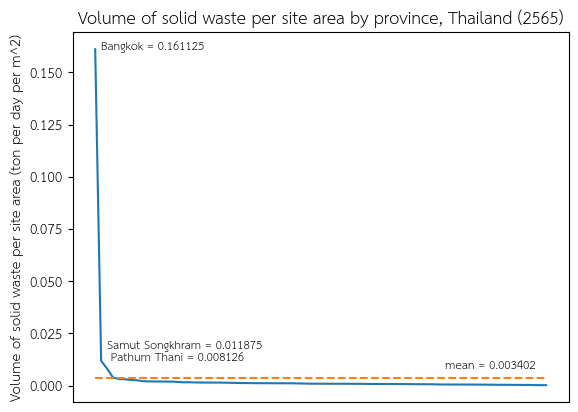

In [197]:
fig, ax = plt.subplots()
ax.plot(df3_merge['Province_E'], df3_merge['volume per area(ton per day per m^2)'])
ax.plot(df3_merge['Province_E'], [df3_merge['volume per area(ton per day per m^2)'].mean()]*len(df3_merge['Province_E']), linestyle='dashed')
#ax.plot(df3_merge['Province_E'], [df3_merge['volume per area(ton per day per m^2)'].median()]*len(df3_merge['Province_E']), linestyle='dashed')

ax.annotate(f'mean = {df3_merge['volume per area(ton per day per m^2)'].mean():2f}',
             xy = (df3_merge['Province_E'][-18:-17], df3_merge['volume per area(ton per day per m^2)'][2:3]), fontsize="small")

plt.xlabel('')
plt.ylabel('Volume of solid waste per site area (ton per day per m^2)')
#ax.legend(["Volume"], loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('Volume of solid waste per site area by province, Thailand (2565)')
plt.gca().set_xticklabels([])
plt.tick_params(bottom = False)

ax.annotate(f'Bangkok = {df3_merge['volume per area(ton per day per m^2)'][:1].values[0]:2f}',
             xy = (df3_merge['Province_E'][1:2], df3_merge['volume per area(ton per day per m^2)'][:1]), fontsize="small")
ax.annotate(f'{df3_merge['Province_E'][1:2].values[0]} = {df3_merge['volume per area(ton per day per m^2)'][1:2].values[0]:2f} \n \
{df3_merge['Province_E'][2:3].values[0]} = {df3_merge['volume per area(ton per day per m^2)'][2:3].values[0]:2f}',
             xy = (df3_merge['Province_E'][2:3], df3_merge['volume per area(ton per day per m^2)'][1:2]), fontsize="small")


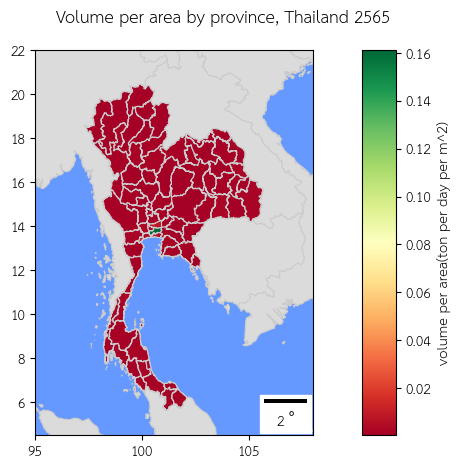

In [199]:
# น่องไก่ 2
map_df_p_merge = map_df_p.merge(df3_merge, left_on='ADM1_EN', right_on='Province_E')
#map_df_p_merge = map_df_p_merge[map_df_p_merge['Solid waste']=='Generated solid waste']
# plot
fig, ax = plt.subplots(1, figsize=(17, 5))
map_df_oa.plot(ax=ax, color="#DBDBDB", edgecolor="0.8", linewidth=0.8)
map_df_p_merge.plot(column='volume per area(ton per day per m^2)', cmap='RdYlGn', linewidth=0.8, ax=ax, edgecolor='0.8')
norm = plt.Normalize(map_df_p_merge['volume per area(ton per day per m^2)'].min(), \
                     map_df_p_merge['volume per area(ton per day per m^2)'].max())
# color bar
sm = plt.cm.ScalarMappable(cmap='RdYlGn', norm=norm)
sm.set_array([])
cax = fig.add_axes([ax.get_position().x1-0.25, ax.get_position().y0, 0.02, ax.get_position().height])
ax.figure.colorbar(sm, cax=cax, label='volume per area(ton per day per m^2)')
ax.add_artist(ScaleBar(1, dimension='angle', units='deg', location="lower right"))
# background color
ax.set_facecolor('#6699FF')
# set map extent
ax.set_xlim([95, 108])
ax.set_ylim([4.5, 22])
# map name
plt.title('Volume per area by province, Thailand 2565 \n', loc='right')
plt.show()

## การนำเข้าส่งออกขยะ

## จะพัฒนาการจัดการขยะยังไง